# CPSC 330 - Applied Machine Learning 

## Homework 7: Clustering and recommender systems
### Associated lectures: Lectures 14 and 15

**Due date: Wednesday, March 22, 11:59pm**


In [1]:
                                import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 0)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<br><br><br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br><br><br>

## Exercise 1: Document clustering toy example <a name="1"></a>
<hr>

In lecture 14, we looked at a popular application of clustering: customer segmentation. In this homework, we will work on a toy example of another popular application: [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A), and clustering is a commonly used technique to organize this data in a meaningful way. 

In this exercise, we will create a toy dataset with sentences from Wikipedia articles and cluster these sentences. 

### 1.1 Sample sentences from Wikipedia articles
rubric={points:2}

The code below extracts first sentences of Wikipedia articles on a set of queries. You will need the `wikipedia` package installed in the course environment to run the code below. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```

You also need `nltk` library in the course environment. 

```
conda install -c anaconda nltk 
```        

**Your tasks:**

Run the code below and answer the following question. 

1. Given this dataset, how many clusters would you expect a clustering algorithm to identify? How would you manually label these clusters?   

> *Note: Feel free to experiment with queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs when they grade your submission.*


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Olsen
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import wikipedia

queries = [
    "Mount Everests",#1
    "Raspberry",#2
    "Mount Denali",#1
    "Arithmetic",#3
    "Topology",#3
    "Baseball",#4
    "Hockey",#4
    "Mango_fruit",#2
    "Mount Kenya",#1
    "Football"#4
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    sent = sent_tokenize(wikipedia.page(queries[i]).content)[0]
    wiki_dict["text"].append(sent)
    wiki_dict["n_words"].append(len(word_tokenize(sent)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

wiki query  \
0  Mount Everests   
1  Raspberry        
2  Mount Denali     
3  Arithmetic       
4  Topology         
5  Baseball         
6  Hockey           
7  Mango_fruit      
8  Mount Kenya      
9  Football         

                                                                                                                                                                                                                                                                                                                                                                                                                                                               text  \
0  Mount Everest (Nepali: ‡§∏‡§ó‡§∞‡§Æ‡§æ‡§•‡§æ, romanized: SagarmƒÅthƒÅ; Tibetan: Chomolungma ‡Ωá‡Ωº‡ºã‡Ωò‡Ωº‡ºã‡ΩÇ‡æ≥‡ΩÑ‡ºã‡Ωò; Chinese: Áè†Á©ÜÊúóÁéõÂ≥∞; pinyin: Zh≈´m√πl«éngm«é Fƒìng) is Earth's highest mountain above sea level, located in the Mahalangur Himal sub-range of the Himalayas.                                                                                                                                                                                                                        
1  The raspberry is the edible fruit of a multitude of plant species in the genus Rubus of the rose family, most of which are in the subgenus Idaeobatus.                                                                                                                                                                                                                                                                                                             
2  Denali (; also known as Mount McKinley, its former official name) is the highest mountain peak in North America, with a summit elevation of 20,310 feet (6,190 m) above sea level.                                                                                                                                                                                                                                                                                 
3  Arithmetic (from Ancient Greek  ·ºÄœÅŒπŒ∏ŒºœåœÇ (arithm√≥s) 'number', and  œÑŒπŒ∫ŒÆ [œÑŒ≠œáŒΩŒ∑] (tik·∏ó [t√©khnƒì]) 'art, craft') is an elementary part of mathematics that consists of the study of the properties of the traditional operations on numbers‚Äîaddition, subtraction, multiplication, division, exponentiation, and extraction of roots.                                                                                                                                  
4  In mathematics, topology (from the Greek words œÑœåœÄŒøœÇ, 'place, location', and ŒªœåŒ≥ŒøœÇ, 'study') is concerned with the properties of a geometric object that are preserved under continuous deformations, such as stretching, twisting, crumpling, and bending; that is, without closing holes, opening holes, tearing, gluing, or passing through itself.                                                                                                             
5  Basketball is a team sport in which two teams, most commonly of five players each, opposing one another on a rectangular court, compete with the primary objective of shooting a basketball (approximately 9.4 inches (24 cm) in diameter) through the defender's hoop (a basket 18 inches (46 cm) in diameter mounted 10 feet (3.048 m) high to a backboard at each end of the court), while preventing the opposing team from shooting through their own hoop.   
6  Hockey is a term used to denote a family of various types of both summer and winter team sports which originated on either an outdoor field, sheet of ice, or dry floor such as in a gymnasium.                                                                                                                                                                                                                                                                    
7  A mango is an edible stone fruit produced by 

*Given this dataset, how many clusters would you expect a clustering algorithm to identify? How would you manually label these clusters?*

Answer:

I would expect 4 clusters. I would manually label the text for each query as the following:

* "Mount Everests",#1 - 'mountain'
* "Raspberry",#2 - 'fruit'
* "Mount Denali",#1 - 'mountain'
* "Arithmetic",#3 - 'mathematics'
* "Topology",#3 - 'mathematics'
* "Baseball",#4 - 'sport'
* "Hockey",#4 - 'sport'
* "Mango_fruit",#2 - 'fruit'
* "Mount Kenya",#1 - 'mountain'
* "Football"#4 - 'sport'



<br><br>

### 1.2 `KMeans` with bag-of-words representation 
rubric={points:10}

We have seen that before we pass text to machine learning models, we need to encode it into a numeric representation. So let's encode our toy dataset above (`wiki_df`) to a numeric representation. 

First, let's try our good old friend: bag-of-words representation. The code below creates dense bag-of-words representation of Wikipedia sentences from question 1.1 using a [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 

**Your tasks:**

Run the code below and answer the following questions. 

1. Run `KMeans` clustering on the transformed data (`bow_sents`) with K = the number of clusters you identified in question 1.1. Examine clustering labels assigned by `KMeans`.
2. Repeat after modifying the `CountVectorizer` to ignore words appearing in only one sentence (or document, one row of `wiki_df`).
3. Keeping the new `CountVectorizer`, examine clustering labels assigned by `KMeans` under an off-by-1 value of K.
4. Briefly describe and analyze the behavoir of `KMeans`. Is `KMeans` doing a reasonable job in clustering the sentences? 

> You can access cluster label assignments using `labels_` attribute of the clustering object. 

In [4]:
vec = CountVectorizer(stop_words='english')
bow_sents = vec.fit_transform(wiki_df["text"]).todense()
bow_df = pd.DataFrame(
    data=bow_sents, columns=vec.get_feature_names_out(), index=wiki_df.index
)
bow_df

048  10  18  190  20  24  310  46  addition  africa  ...  winter  words  \
0  0    0   0   0    0   0   0    0   0         0       ...  0       0       
1  0    0   0   0    0   0   0    0   0         0       ...  0       0       
2  0    0   0   1    1   0   1    0   0         0       ...  0       0       
3  0    0   0   0    0   0   0    0   1         0       ...  0       0       
4  0    0   0   0    0   0   0    0   0         0       ...  0       1       
5  1    1   1   0    0   1   0    1   0         0       ...  0       0       
6  0    0   0   0    0   0   0    0   0         0       ...  1       0       
7  0    0   0   0    0   0   0    0   0         0       ...  0       0       
8  0    0   0   0    0   0   0    0   0         1       ...  0       0       
9  0    0   0   0    0   0   0    0   0         0       ...  0       0       

   zh≈´m√πl«éngm«é  ŒªœåŒ≥ŒøœÇ  œÑŒ≠œáŒΩŒ∑  œÑŒπŒ∫ŒÆ  œÑœåœÄŒøœÇ  ‡§∏‡§ó‡§∞‡§Æ  ·ºÄœÅŒπŒ∏ŒºœåœÇ  Áè†Á©ÜÊúóÁéõÂ≥∞  
0  1            0      0      0     0      1     0        1      
1  0            0      0      0     0      0     0        0      
2  0            0      0      0     0      0     0        0      
3  0            0      1      1     0      0     1        0      
4  0            1      0      0     1      0     0        0      
5  0            0      0      0     0      0     0        0      
6  0            0      0      0     0      0     0        0      
7  0            0      0      0     0      0     0        0      
8  0            0      0      0     0      0     0        0      
9  0            0      0      0     0      0     0        0      

[10 rows x 169 columns]

In [5]:
#Run KMeans clustering on the transformed data (bow_sents) with K = the number of clusters
#you identified in question 1.1. Examine clustering labels assigned by KMeans.

#code based on lecture 14

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(bow_df)
#kmeans.predict(bow_df)
#kmeans.cluster_centers_
bow_kcl = pd.DataFrame()
bow_kcl["queries"] = queries
bow_kcl["cluster"] = kmeans.labels_
bow_kcl

C:\Users\Olsen L\.conda\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


queries  cluster
0  Mount Everests  3      
1  Raspberry       1      
2  Mount Denali    3      
3  Arithmetic      2      
4  Topology        1      
5  Baseball        0      
6  Hockey          1      
7  Mango_fruit     1      
8  Mount Kenya     3      
9  Football        1

Clusters are a bit different from manual clustering - mountains are together; fruits, some sports, and topology are together; arithmetic and baseball are on their own. Changing the random seed can change this clustering a lot.


In [6]:
#Repeat after modifying the CountVectorizer to ignore words appearing in only one sentence (or document, one row of wiki_df).

In [7]:
#based on lecture 6

vec2 = CountVectorizer(stop_words='english', min_df=2)
bow_sents2 = vec2.fit_transform(wiki_df["text"]).todense()
bow_df2 = pd.DataFrame(
    data=bow_sents2, columns=vec2.get_feature_names_out(), index=wiki_df.index
)
bow_df2

edible  family  feet  fruit  greek  highest  level  mathematics  mount  \
0  0       0       0     0      0      1        1      0            1       
1  1       1       0     1      0      0        0      0            0       
2  0       0       1     0      0      1        1      0            1       
3  0       0       0     0      1      0        0      1            0       
4  0       0       0     0      1      0        0      1            0       
5  0       0       1     0      0      0        0      0            0       
6  0       1       0     0      0      0        0      0            0       
7  1       0       0     1      0      0        0      0            0       
8  0       0       0     0      0      2        0      0            1       
9  0       1       0     0      0      0        0      0            0       

   mountain  properties  sea  sports  study  team  
0  1         0           1    0       0      0     
1  0         0           0    0       0      0     
2  1         0           1    0       0      0     
3  0         1           0    0       1      0     
4  0         1           0    0       1      0     
5  0         0           0    0       0      2     
6  0         0           0    1       0      1     
7  0         0           0    0       0      0     
8  1         0           0    0       0      0     
9  0         0           0    1       0      1

In [8]:
#code based on lecture 14

kmeans2 = KMeans(n_clusters=4, random_state=1)
kmeans2.fit(bow_df2)
#kmeans.predict(bow_df)
#kmeans.cluster_centers_
bow_kcl2 = pd.DataFrame()
bow_kcl2["queries"] = queries
bow_kcl2["cluster"] = kmeans2.predict(bow_df2)
bow_kcl2

C:\Users\Olsen L\.conda\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


queries  cluster
0  Mount Everests  1      
1  Raspberry       3      
2  Mount Denali    1      
3  Arithmetic      2      
4  Topology        2      
5  Baseball        0      
6  Hockey          0      
7  Mango_fruit     3      
8  Mount Kenya     1      
9  Football        0

All the clusters match the manual clustering.

In [9]:
#Keeping the new CountVectorizer, examine clustering labels assigned by KMeans under an off-by-1 value of K.

#code based on lecture 14

kmeans3 = KMeans(n_clusters=5, random_state=1)
kmeans3.fit(bow_df2)
#kmeans.predict(bow_df)
#kmeans.cluster_centers_
bow_kcl3 = pd.DataFrame()
bow_kcl3["queries"] = queries
bow_kcl3["cluster"] = kmeans3.predict(bow_df2)
bow_kcl3

C:\Users\Olsen L\.conda\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


queries  cluster
0  Mount Everests  1      
1  Raspberry       3      
2  Mount Denali    1      
3  Arithmetic      2      
4  Topology        2      
5  Baseball        0      
6  Hockey          4      
7  Mango_fruit     3      
8  Mount Kenya     1      
9  Football        4

Baseball has been put in a separate group.

*Briefly describe and analyze the behavoir of KMeans. Is KMeans doing a reasonable job in clustering the sentences?
You can access cluster label assignments using labels_ attribute of the clustering object.*

Kmeans was doing a bad job when words appearing in just one document were considered, but performed as well as manual labelling when those were removed. It also created a single-document group when the number of clusters was increased by 1, which may not be very useful.



<br><br>

### 1.3 Sentence embedding representation
rubric={points:10}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer representations of text, and we are going to use one such representation in this lab. 

The code below creates an alternative and a more expressive representation of sentences. We will call it *sentence embedding representation*. We'll use [sentence transformer](https://www.sbert.net/index.html) to extract these representations. At this point it's enough to know that this is an alternative representation of text which usually works better than simple bag-of-words representation. We will talk a bit more about embedding representations next week. You need to install `sentence-transformers` in the course conda environment to run the code below. 

```conda install -c conda-forge sentence-transformers```

**Your tasks:**

Run the code below and answer the following questions. 

1. How many dimensions (features associated with each example) are present in this representation? 
2. Run `KMeans` clustering with sentence embedding representation of text (`emb_sents`) and examine cluster labels. 
3. How well the sentences are clustered together? 

In [10]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

In [11]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

0         1         2         3         4         5         6  \
0 -0.532167  0.219127  0.029920 -0.407121 -0.616050  0.339105 -0.369831   
1 -0.257144  0.279162  0.222628  0.190509  0.057312  0.215432  0.124739   
2 -0.153511  0.308003  0.042989 -0.000983 -0.228808  0.145076 -0.189960   
3 -0.182559  0.174978 -0.142932  0.508398 -0.102793  0.314822 -0.028197   
4  0.002731  0.032420  0.043655  0.501372  0.442546  0.157427  0.082318   
5 -0.042878  0.029167 -0.187499 -0.020230 -0.260429 -0.120475  0.067831   
6 -0.071380  0.096587  0.055705 -0.525645  0.580350  0.096592  0.441485   
7 -0.141320  0.030475  0.261100 -0.219024 -0.277812  0.177240  0.191266   
8 -0.291509  0.554150  0.115631 -0.188635 -0.074476 -0.277101 -0.000275   
9 -0.071756  0.133156 -0.071762  0.306060  0.358961 -0.061443  0.167585   

          7         8         9  ...       758       759       760       761  \
0 -0.268620  0.284335  0.154874  ...  0.049629 -0.063531  0.193070  0.345019   
1  0.256541 -0.093520  0.304061  ... -0.350747 -0.103448  0.188898  0.002680   
2  0.006522  0.346580  0.009805  ...  0.345482  0.149473 -0.128204  0.069987   
3  0.235509  0.293719  0.091493  ...  0.153091 -0.220330  0.126606  0.091785   
4  0.287892  0.322356  0.356958  ...  0.267656 -0.337920  0.343272  0.429253   
5  0.296154 -0.020178  0.003125  ...  0.178185 -0.003942  0.331447 -0.395468   
6  0.257062 -0.054260  0.220842  ...  0.457613 -0.331446 -0.066380 -0.019426   
7  0.252725 -0.035201  0.198338  ...  0.104466 -0.177959  0.088619  0.289035   
8  0.076825  0.199134  0.033997  ...  0.055575  0.047854  0.214838 -0.086142   
9  0.364614  0.323540  0.141398  ...  0.404115  0.000236  0.177493  0.016162   

        762       763       764       765       766       767  
0  0.111517 -0.018490  0.062622 -0.105441  0.084189  0.097068  
1  0.364524  0.270560  0.617305  0.565283  0.068011  0.210108  
2 -0.049316 -0.122242 -0.520354  0.052404  0.277886 -0.082411  
3  0.087272  0.279831 -0.328508  0.157603  0.439282  0.204193  
4 -0.042079  0.466611 -0.574507  0.004958  0.390041  0.150982  
5  0.025013  0.082307 -0.561699  0.560588  0.141633 -0.373938  
6 -0.147649  0.034530 -0.095109  0.304423  0.327636 -0.197770  
7 -0.089657  0.246049 -0.060229  0.500508 -0.045897 -0.046336  
8  0.453633  0.021888 -0.143639  0.167839 -0.151438 -0.076444  
9  0.232335  0.260556  0.168149  0.483963  0.121122  0.196881  

[10 rows x 768 columns]

*How many dimensions (features associated with each example) are present in this representation?*

There are 768 features for each example in this representation.


In [12]:
#Run KMeans clustering with sentence embedding representation of text (emb_sents) and examine cluster labels.

#code based on lecture 14

kmeans4 = KMeans(n_clusters=4, random_state=1)
kmeans4.fit(emb_sent_df)
#kmeans.predict(bow_df)
#kmeans.cluster_centers_
emb_kcl = pd.DataFrame()
emb_kcl["queries"] = queries
emb_kcl["cluster"] = kmeans4.labels_ 
emb_kcl

C:\Users\Olsen L\.conda\envs\cpsc330\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


queries  cluster
0  Mount Everests  2      
1  Raspberry       1      
2  Mount Denali    2      
3  Arithmetic      0      
4  Topology        0      
5  Baseball        3      
6  Hockey          3      
7  Mango_fruit     1      
8  Mount Kenya     2      
9  Football        3

*How well the sentences are clustered together?*

The clusters match the manual labels; each category is clustered together according to what would be expected (given k=4).

<br><br>

### 1.4 DBSCAN with cosine distance  
rubric={points:10}

Let's try `DBSCAN` on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text (sparse data), [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work better. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$

In this exercise, you'll use DBSCAN with cosine distances. 

**Your tasks**

1. Use DBSCAN to cluster our toy data using sentence embedding representation (`emb_sents`) and `metric='cosine'`. 
2. Briefly comment on the number of clusters identified and the cluster assignment given by the algorithm.

> *Note: You will also have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values for these hyperparameters won't work on this toy dataset. In order to set appropriate value for `eps`, you may want to examine the distances given by [sklearn's `cosine_distance`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.paired_cosine_distances.html).*

In [13]:
from sklearn.metrics.pairwise import cosine_distances

pd.DataFrame(cosine_distances(emb_sent_df, emb_sent_df), columns=queries, index=queries)

Mount Everests  Raspberry  Mount Denali  Arithmetic  Topology  \
Mount Everests  0.000000        0.931335   0.424351      0.827909    0.870119   
Raspberry       0.931335        0.000000   0.906466      0.847008    0.864610   
Mount Denali    0.424351        0.906466   0.000000      0.907096    0.854794   
Arithmetic      0.827909        0.847008   0.907096      0.000000    0.381103   
Topology        0.870119        0.864610   0.854794      0.381103    0.000000   
Baseball        0.925508        0.869627   0.856469      0.772545    0.755116   
Hockey          0.951119        0.903234   0.815634      0.812594    0.753566   
Mango_fruit     0.841844        0.522127   0.853448      0.902332    0.842974   
Mount Kenya     0.409439        0.898711   0.456956      0.889986    0.955045   
Football        0.991959        0.839252   0.904455      0.816896    0.792475   

                Baseball    Hockey  Mango_fruit  Mount Kenya  Football  
Mount Everests  0.925508  0.951119  0.841844     0.409439     0.991959  
Raspberry       0.869627  0.903234  0.522127     0.898711     0.839252  
Mount Denali    0.856469  0.815634  0.853448     0.456956     0.904455  
Arithmetic      0.772545  0.812594  0.902332     0.889986     0.816896  
Topology        0.755116  0.753566  0.842974     0.955045     0.792475  
Baseball        0.000000  0.596294  0.951435     0.831017     0.528303  
Hockey          0.596294  0.000000  0.916049     0.954532     0.526190  
Mango_fruit     0.951435  0.916049  0.000000     0.806186     0.845019  
Mount Kenya     0.831017  0.954532  0.806186     0.000000     0.938583  
Football        0.528303  0.526190  0.845019     0.938583     0.000000

In [14]:
dbscan = DBSCAN(eps=0.6, min_samples=1, metric='cosine')
dbscan.fit(emb_sent_df)
emb_dbcl = pd.DataFrame()
emb_dbcl["queries"] = queries
emb_dbcl["cluster"] = dbscan.labels_
emb_dbcl

queries  cluster
0  Mount Everests  0      
1  Raspberry       1      
2  Mount Denali    0      
3  Arithmetic      2      
4  Topology        2      
5  Baseball        3      
6  Hockey          3      
7  Mango_fruit     1      
8  Mount Kenya     0      
9  Football        3

By examining the cosine distance matrix, it seems that 0.6 would be a reasonable distance to separate clusters. min_samples=1 gave a reasonable results, with each cluster containing more than 1 sample even though 1-sample clusters were allowed, so it was not changed.

*Briefly comment on the number of clusters identified and the cluster assignment given by the algorithm.*

4 clusters were assigned, which matches the manual labelling. All the samples were put into reasonable-looking clusters, also matching manual labelling, with no noise points. 

<br><br>

### 1.5 Visualizing clusters 
rubric={points:5}

One thing we could do with unlabeled data is visualizing it. That said, our data is high dimensional (each example is represented with 768 dimensions) and high-dimensional data is hard to visualize. One way to visualize high-dimensional data is applying dimensionality reduction to get the most important (2 or 3) components of the dataset and visualizing this low-dimensional data. 

Given data as a `numpy` array and cluster assignments, the `plot_pca_clusters` function below transforms the given data by applying dimensionality reduction and plots the transformed data into corresponding clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the PCA part. Feel free to modify the function as you see fit.*

**Your tasks:**

1. Call the function `plot_pca_clusters` to visualize the clusters created by the three models above:
    - KMeans with bag-of-words representation 
    - KMeans with sentence embedding representation 
    - DBSCAN with sentence embedding representation 

In [15]:
from sklearn.decomposition import PCA # Obtain the principal components

def plot_pca_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization",
):
    """
    Carry out dimensionality reduction using PCA and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])
    pca_df["cluster"] = cluster_labels

    plt.figure(figsize=(10, 7))
    plt.title(title)
    ax = sns.scatterplot(
        x="pca1", y="pca2", hue="cluster", data=pca_df, palette="tab10", s=size
    )

    x = pca_df["pca1"].tolist()
    y = pca_df["pca2"].tolist()
    if show_labels:
        for i, txt in enumerate(raw_sents):
            plt.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
        ax.legend(loc="upper right")

    plt.show()

KMeans with bag-of-words representation:

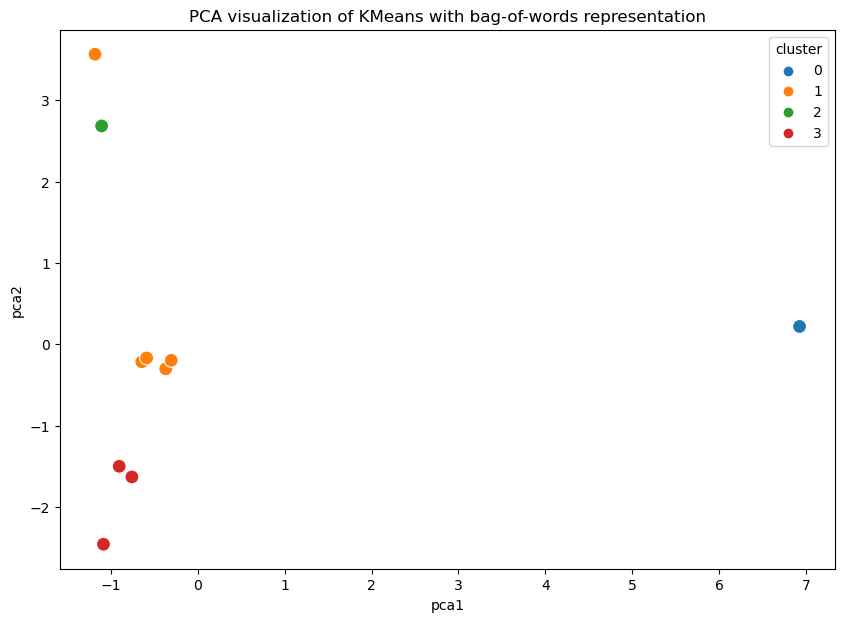

In [17]:
plot_pca_clusters(
    np.asarray(bow_sents),
    kmeans.labels_,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization of KMeans with bag-of-words representation",
)

 KMeans with sentence embedding representation:

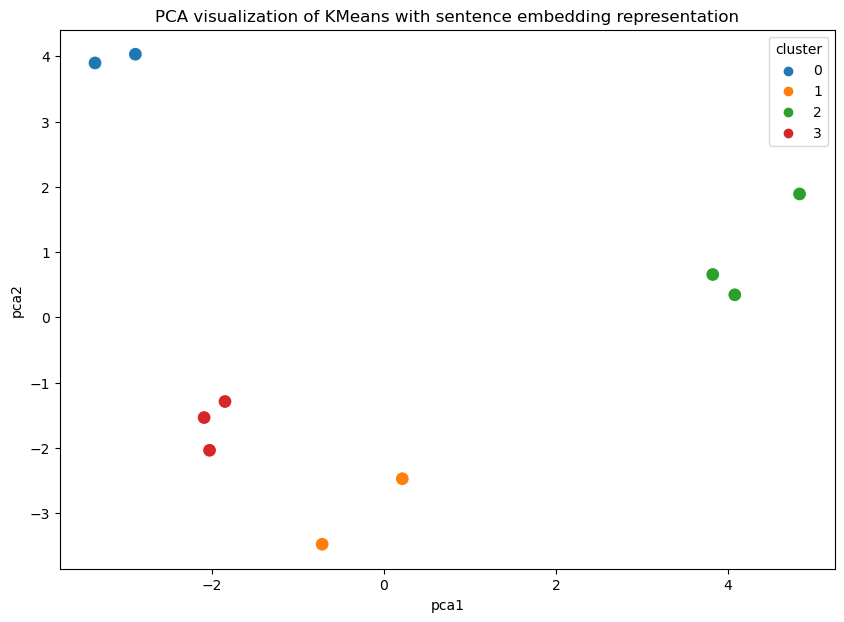

In [18]:
plot_pca_clusters(
    np.asarray(emb_sent_df),
    kmeans4.labels_,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization of KMeans with sentence embedding representation",
)

DBSCAN with sentence embedding representation:

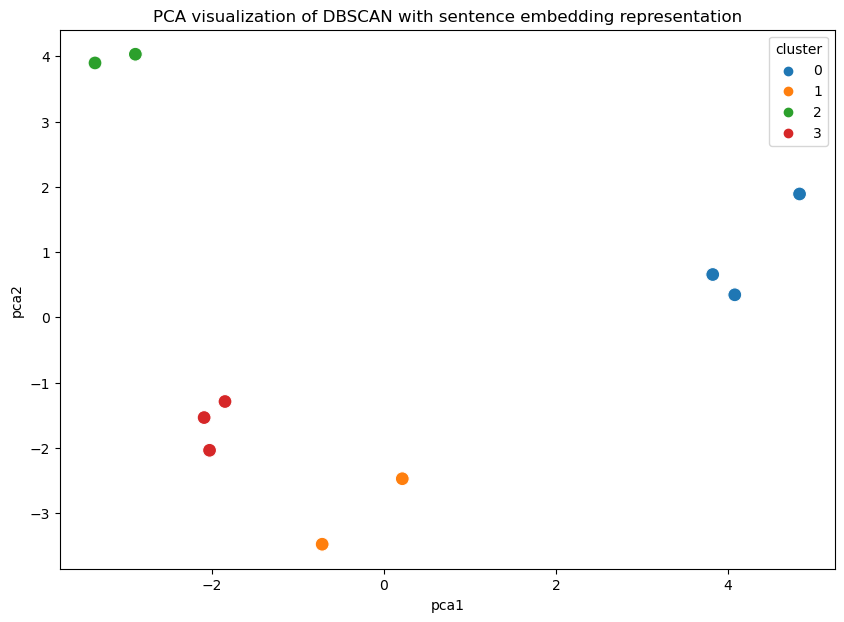

In [19]:
plot_pca_clusters(
    np.asarray(emb_sent_df),
    dbscan.labels_,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization of DBSCAN with sentence embedding representation",
)

<br><br><br><br>

## Exercise 2: Movie recommendations
<hr>

Let's build simple movie recommendation systems using the [MovieLens dataset](https://www.kaggle.com/prajitdatta/movielens-100k-dataset/data). The original source of the data is [here](https://grouplens.org/datasets/movielens/), and the structure of the data is described in the [README](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) that comes with it. The code below reads the data as a CSV assuming that it's under `data/ml-100k/` directory under your lab folder. 

In [20]:
r_cols = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_csv(
    os.path.join("data", "ml-100k", "u.data"),
    sep="\t",
    names=r_cols,
    encoding="latin-1",
)
ratings.head()

user_id  movie_id  rating  timestamp
0  196      242       3       881250949
1  186      302       3       891717742
2  22       377       1       878887116
3  244      51        2       880606923
4  166      346       1       886397596

In [21]:
# We'll be using these keys later in the starter code
user_key = "user_id"
item_key = "movie_id"

### 2.1 Terminology
rubric={points:6}

Here is some notation we will be using in this lab. 

**Constants**:

 - $N$: the number of users, indexed by $n$
 - $M$: the number of movies, indexed by $m$
 - $\mathcal{R}$: the set of indices $(n,m)$ where we have ratings in the utility matrix $Y$
    - Thus $|\mathcal{R}|$ is the total number of ratings
 - $k$: the number of latent dimensions we use in collaborative filtering
 
**The data**:

 - $Y$: the utility matrix containing ratings, with a lot of missing entries
 - $Z$: a matrix whose rows $z_m$ represent the features for movie $m$ (size $M\times d$).
 - `train_mat` and `valid_mat`: Utility matrices for train and validation sets, respectively
 
    
**Your tasks:**    

1. What are the values of $N$ and $M$ in movie ratings data?  
2. What would be the shape of the dense utility matrix $Y$? 
3. What would be the fraction of observed ratings in the utility matrix $Y$? 

In [22]:
N = len(ratings["user_id"].unique())
M = len(ratings["movie_id"].unique())

In [23]:
print("The dense utility matrix  ùëå would have the shape", N, "by", M)

The dense utility matrix  ùëå would have the shape 943 by 1682


In [24]:
print("The fraction of observed ratings in the utility matrix  ùëå would be", len(ratings["rating"]), "/", N*M, "=", len(ratings["rating"])/(N*M))

The fraction of observed ratings in the utility matrix  ùëå would be 100000 / 1586126 = 0.06304669364224531


<br><br>

### 2.2 Splitting the data
rubric={points:5}

**Your tasks:**

1. Split the ratings data with `test_size=0.2` and `random_state=42`. 

In [25]:
#code based on lecture 16
from sklearn.model_selection import train_test_split

X = ratings.copy()
y = ratings[user_key]
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#X_train.shape, X_valid.shape

<br><br>

### 2.3 Utility matrix 
rubric={points:10}

**Your tasks**
1. Create utility matrices for train and validation sets (similar to how we did in the class). 
2. Briefly explain the difference between the train and validation utility matrices. 

> You may use the code from lecture notes with appropriate attributions.  

> You won't do it in real life but since our dataset is not that big, create a dense utility matrix in this assignment. You are welcome to try sparse matrix but then you may have to change some started code provided in the later exercises.  

In [26]:
user_mapper = dict(zip(np.unique(ratings[user_key]), list(range(N))))
item_mapper = dict(zip(np.unique(ratings[item_key]), list(range(M))))
user_inverse_mapper = dict(zip(list(range(N)), np.unique(ratings[user_key])))
item_inverse_mapper = dict(zip(list(range(M)), np.unique(ratings[item_key])))

In [27]:
train_mat = None
valid_mat = None

In [28]:
#code from lecture 16

def create_Y_from_ratings(
    data, N, M, user_mapper, item_mapper, user_key, item_key
):  # Function to create a dense utility matrix
    Y = np.zeros((N, M))
    Y.fill(np.nan)
    for index, val in data.iterrows():
        n = user_mapper[val[user_key]]
        m = item_mapper[val[item_key]]
        Y[n, m] = val["rating"]

    return Y

In [ ]:
train_mat = create_Y_from_ratings(X_train, N, M, user_mapper, item_mapper, user_key, item_key)
valid_mat = create_Y_from_ratings(X_valid, N, M, user_mapper, item_mapper, user_key, item_key)

The train utility matrix has 80% of the ratings in the ratings dataset, and the validation matrix has the remaining 20%. However they have the same shape, as they have all the same rows and columns (i.e. N and M). The train matrix simply has some of the indices (n,m) filled in, and the valid matrix has some others filled in.

<br><br>

### 2.4 Evaluation and baseline
rubric={points:4}

To compare different models you build in this homework, let's write a couple of functions for evaluation. 
- The `error` function returns RMSE.
- The `evaluate` function prints the train and validation RMSEs. 

**Your task:**

1. Briefly explain what exactly we are comparing to evaluate recommender systems. 
2. Implement the global average baseline, where you predict everything as the global average rating. What's the RMSE of the global average baseline?

In [29]:
def error(Y1, Y2):
    """
    Returns the root mean squared error (RMSE).
    """
    return np.sqrt(np.nanmean((Y1 - Y2) ** 2))


def evaluate(pred_Y, train_mat, valid_mat, model_name="Global average"):
    print("%s train RMSE: %0.2f" % (model_name, error(pred_Y, train_mat)))
    print("%s valid RMSE: %0.2f" % (model_name, error(pred_Y, valid_mat)))

1. We are comparing how the good the recommender system is at predicting a rating for a particular user/movie index. To evaluate this prediction, we let the model learn from the ratings in the train set, predict values for the missing ratings, and then calculate the root mean squared error (RMSE) of those predictions against the ratings held out from the train set (the validation set). Low RMSE means good predictions, which is useful for a recommender system.

In [32]:
avg = np.nanmean(np.asarray(train_mat))

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [30]:
# global average baseline
#code based on lecture 16

avg = np.nanmean(train_mat)
pred_g = np.zeros(train_mat.shape) + avg
evaluate(pred_g, train_mat, valid_mat, model_name="Global average")

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

The validation RMSE of the global average baseline is 1.12.

<br><br>

### (Optional) 2.5 $k$-nearest neighbours imputation
rubric={points:1}

**Your tasks:**

Try [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) to fill in the missing entries. Discuss your observations. 

In [ ]:
train_mat[0]

In [ ]:
train_mat_imp[0]

In [ ]:
#based on lecture 16
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10, keep_empty_features=True) #second arg will make all missing columns into 0s. Considered reasonable for this assignment here in comments here:
                                                               # https://piazza.com/class/lcgo6c2ncl06el/post/592
train_mat_imp = imputer.fit_transform(train_mat)
evaluate(train_mat_imp, train_mat, valid_mat, model_name="KNN imputer")

In [51]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.3.


<br><br>

### 2.6 Use collaborative filtering with the `surprise` package
rubric={points:6}

Use the [`surprise`](https://surprise.readthedocs.io/en/stable/) package which has implementation of SVD algorithm for collaborative filtering. You can install it as follows in your conda environment. 

```
>> conda activate cpsc330
>> conda install -c conda-forge scikit-surprise
or 
>> pip install scikit-surprise
```

**Your tasks:**

1. Carry out cross-validation using SVD algorithm in the package, similar to how we did it in the lecture on Jester dataset. Report mean RMSE and compare it with global baseline. 

In [ ]:
#code below based on lecture 16
import surprise
from surprise import SVD, Dataset, Reader, accuracy

In [ ]:
ratings_short = ratings.drop(["timestamp"], axis=1) #error if I use the entire ratings dataset

In [ ]:
reader = Reader()
data = Dataset.load_from_df(ratings_short, reader)  # Load the data

#trainset, validset = surprise.model_selection.train_test_split(
#    data, test_size=0.2, random_state=42
#)  # Split the data

In [ ]:
k = 10
algo = SVD(n_factors=k, random_state=42)

In [ ]:
from surprise.model_selection import cross_validate

results = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

In [ ]:
print("mean RMSE is", np.mean(results['test_rmse']))

This is better than the baseline, which was 1.12, but not by a lot (as they are both close to 1).

<br><br>

### 2.7 Clustering based recommendation system?
rubric={points:2}

How would you apply `K-Means` clustering to build a recommendation systems? What could be challenging with this approach?

I would try to cluster users with similar movie choices, and also perhaps movies with similar ratings. Unknown (n,m) indices could then be grouped according to these clusters, e.g. ... #TODO complete

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from ‚Äú1‚Äù will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 